# Partial Observability

In this assignment, we explore methods to update the belief state and employ belief transition functions to calculate state values. Note that in Partially Observable MDPs (POMDPs), the agent cannot directly observe the underlying state. After taking an action and making observations, the agent updates its belief about the state it is in. You can read more about POMDPs [here](https://en.wikipedia.org/wiki/Partially_observable_Markov_decision_process).

Let $b(s)$ denote the probability that the agent is in state $s \in S$.

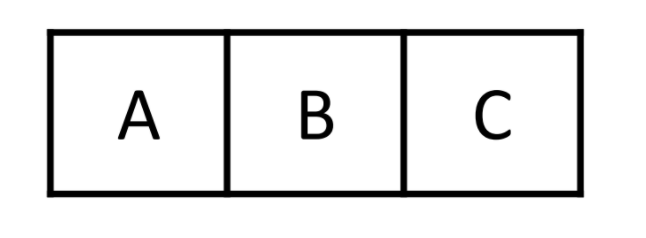

Let us consider the Mini-Gridworld example discussed in the lecture. We have 
- States $S$: A, B, C (encoded as 0,1,2)
- Actions $A$: L, R (encoded as 0,1)
- Transition probabilities $T$: T[successor_state, current_state, action] =  0.8 in the "Intended direction"
- Observations $\Omega$: NoWall, Wall (encoded as 0, 1)
- Sensor model, or conditional observation probabilities $O$: $O(1|A) = 0.5, O(1|C) = 0.5, O(1|B) = 0$

#### Note: Please do not modify any pre-defined variables. Doing so can affect the autograder results.


In [ ]:
# importing required libraries
import numpy as np

# problem constants
# states
S = [0, 1, 2]
Omega = [0, 1]

# transition probabilities
#T[_s, s, a] = 0.8 in the intended direction. 0.2 in the opposite direction. 0 if not reachable.

T = np.zeros((3, 3, 2))
T[0,0,0] = 0.8
T[1,0,0] = 0.2
T[2,0,0] = 0

T[0,1,0] = 0.8
T[1,1,0] = 0
T[2,1,0] = 0.2

T[0,2,0] = 0
T[1,2,0] = 0.8
T[2,2,0] = 0.2

for _s in S:
    for s in S:
        if T[_s, s, 0] == 0:  
            T[_s, s, 1] = 0
        else: 
            T[_s, s, 1] = 1 - T[_s, s, 0]
        
# observation probabilities
O = np.zeros((2, 3))
O[1, 0] = 0.5
O[1, 1] = 0
O[1, 2] = 0.5
O[0, 0] = 0.5
O[0, 1] = 1
O[0, 2] = 0.5

## Belief State Value

The belief state is updated using Bayes' rule:

$$b'(s')= O(o\mid s')\sum _{{s\in S}}T(s'\mid s,a)b(s)$$

We first implement a method to update a belief state $b(s)$ given an action $a$ and observation $o$.

> Hint: You can use functions from the numpy library to normalize an array.

In [ ]:
def update_belief(belief, action, observation):
    # create a copy for the new updated belief state array
    updated_belief = np.zeros_like(belief)
    
    for _s in S: # states
        
        weighted_probabilities = 0
        
        # Use bayes rule to calculate `weighted_probabilities`
        # your code here
        
        
        updated_belief[_s] = O[observation, _s] * weighted_probabilities
    
    # normalize updated belief state values to turn them into probabilities
    # your code here
    
    
    return updated_belief

Let's test the above function.

In [ ]:
B = np.ones(3)/3
action = 0      # move left
observation = 1 # wall

B_ = update_belief(B, action, observation)
assert not np.allclose(B_, B), "Are not updating the belief state at all?"
assert np.allclose(B_, np.array([0.8, 0, 0.2])), "Are not updating the belief state correctly?"

In [ ]:
# hidden test cases

## Belief Transition Function

Given that the agent does not knows its current state, one cannot use a deterministic transition function for state-action transitions. Instead, POMDPs have a belief transition function $\tau$

$$\tau(b,a,b') = \sum_{s'} O(o | s') \sum_{s}  T(s'|s,a) b(s)$$

Simply put, for each observation $o$, $\tau$ is the result of summing over "unnormalized" belief states.

> Hint: Try breaking the sum into individual steps.

In [ ]:
def belief_transition(belief, action, observation):
    p = 0
    o = observation
    
    for _s in S:
        # Compute the total sum
        # your code here
        
    
    return p

In [ ]:
B = np.ones(3)/3
action = 0      # move left
observation = 1 # observe wall
t = belief_transition(B, action, observation)
assert abs(t - 1/3) < 1e-2, "Belief Transition incorrect when moving left and observing wall. Try breaking the sum into individual steps."

In [ ]:
# hidden test cases

In [ ]:
# hidden test cases
